# Chapter 3 - Linear Regression

This chapter is about lienar regression, a simple yet useful tool to predict a quantitative response in a supervised learning context. Many modern day statistical learning aproaches can be seen as generalizations or extensions of linear regression.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="darkgrid", palette="Set1")

We are going to use the _Advertising.csv_ dataset and will try to answer some of the following statements:

1. Is there a relationship between advertising budget and sales?
2. How strong is the relationship between advertising budget and sales?
3. Which media contribute to sales?
4. How accurately can we estimate de effect of each medium on sales?
5. How accurately can we predict future sales?
6. Is the relationship linear?
7. Is there synergy among the advertising media?

First, we can load the data set into a pandas DataFrame:

In [3]:
ads = pd.read_csv("../data/Advertising.csv", index_col=0)
ads.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## 3.1 Simple Lienar Regression

Simple linear regression is an approach for predicting a quantitative reponse **Y** from a single predictor variable **X**, assuming that there is a approximately linear relationship between the two.

This linear equation can be written as follows:

$$
Y \approx \beta_0  + \beta_1 X
$$

In our case we can regress the **Sales** onto **TV** by fitting the following model :

$$
Sales \approx \beta_0  + \beta_1 \times TV
$$

Where:

- $\beta_0$ and $\beta_1$ are respectively the **intercept** and **slope** of the linear model
- Together, $\beta_0$ and $\beta_1$ are know as the **model coefficients** or **parameters**

After we fit our model with the training data to produce the estimates $\hat{\beta_0}$ and $\hat{\beta_1}$, we can predict future sales ($\hat{y}$) for a particular value of TV advertising:


$$
\hat{y} \approx \hat{\beta_0}  + \hat{\beta_1} x
$$

Where $\hat{y}$ indicates the prediction of **Y** when **X** = x

### 3.1.1 Estimating the Coefficients|

The values of $\beta_0$ and $\beta_1$ are unknown, so our goal is to obtain the estimates $\hat{\beta_0}$ and $\hat{\beta_1}$ such that the resulting line is as close as possible to the *n=200* datapoints. In other words, we have to find $\hat{\beta_0}$ and $\hat{\beta_1}$ such that:

$$
y_i \approx \hat{\beta_0}  + \hat{\beta_1} x_i \\
i = 1, ... , n
$$

We will be using the **least squares criterion** to measure the *closeness* of the data point to the regression line

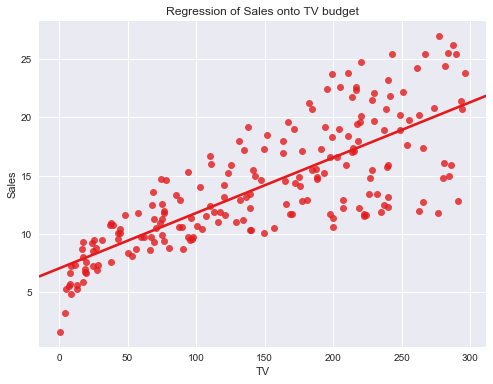

In [4]:
plt.figure(figsize=(8,6))
sns.regplot(x=ads['TV'], y=ads['Sales'],data=ads, ci=None)
plt.title("Regression of Sales onto TV budget")
plt.show()

We define the prediction of Y based on the *i*th value of X as being:

$$
\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_i
$$

Then $e_i = y_i - \hat{y_i}$ represents the *i*th **residual** i.e. the difference between the observed and predicted values of *y*

the **residual sum of squares (RSS)** is defined as:

$$
RSS = e_1^2 \, + \, e_2^2 \, + \, ... \, + \, e_n^2
$$

$$
RSS = (y_1 - \hat{\beta_0} - \hat{\beta_1} x_1)^2 +
      (y_2 - \hat{\beta_0} - \hat{\beta_1} x_2)^2 + \, ...\, +
      (y_n - \hat{\beta_0} - \hat{\beta_1} x_n)^2
$$

So if our goal is to minimize the **RSS**, obtain the minimizers as:

$$
\hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \\
$$

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}
$$

Where $\bar{y}$ and $\bar{x}$ are the **sample means**.

We can obtain the $\hat{\beta_0}$ and $\hat{\beta_1}$ for the regression of Sales onto TV budget:

In [14]:
x_mean = ads['TV'].mean()
y_mean = ads['Sales'].mean()
print("TV budget mean: {}".format(x_mean))
print("Sales mean: {}".format(y_mean))

TV budget mean: 147.0425
Sales mean: 14.022500000000003


In [21]:
def get_b1 (x, y):
    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    numerator = 0
    denominator = 0
    
    for i in range(0, n):
        numerator += (x.iloc[i]-x_mean)*(y.iloc[i]-y_mean)
        denominator += (x.iloc[i]- x_mean)**2
    
    return numerator/denominator

def get_b0(x, y):
    return y.mean() - get_b1(x,y)*x.mean()

def get_RSS(x, y):
    rss = 0
    n = len(x)
    
    b0 = get_b0(x, y)
    b1 = get_b1(x, y)
    
    for i in range(0, n):
        rss += (y.iloc[i] - b0 - b1* x.iloc[i])**2
        
    return rss


b1 = get_b1(ads['TV'], ads['Sales'])
b0 = get_b0(ads['TV'], ads['Sales'])
RSS = get_RSS(ads['TV'], ads['Sales'])

print("β̂0 =", b0)
print("β̂1 =", b1)
print("RSS =", RSS)

β̂0 = 7.03259354913
β̂1 = 0.047536640433
RSS = 2102.53058313


 * **Verifying with scikit learn:**

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

X = ads['TV'].values.reshape(-1, 1)
y = ads['Sales']

reg.fit(X,y)

print("β̂0 =", reg.intercept_)
print("β̂1 =", reg.coef_[0])

β̂0 = 7.03259354913
β̂1 = 0.047536640433


From this results we can styate that a $1000 ingrease in the TV advertisement budget leads to a increase of 47.5 in sales

### 3.1.2 Assessing the Accuracy of the Coefficient Estimates